#### import libaries

In [110]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [111]:
data = pd.read_csv('dataset.csv') #read the data to pd
X = data.iloc[:,:-1].values #slice X features
y = data.iloc[:,-1].values #slice wanted y to predict

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


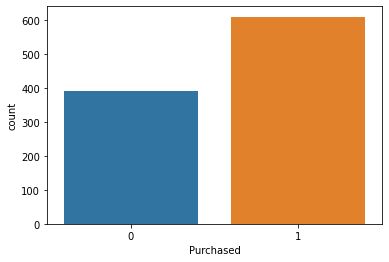

In [112]:
sns.countplot(data['Purchased']) #data doesn't has balance. 

Balance The data by using Synthetic Minority Oversampling Technique (SMOTE)

In [113]:
smote = SMOTE()
X,y = smote.fit_resample(X, y) #fit predictor and target variable

In [114]:
mm_x = MinMaxScaler() #for scaling the data

### Function to measure the models.

In [115]:
def measuring_metrics(f1,checked_parmeter):
    result_table={}
    result_table["checked parmeter"] = np.array(checked_parmeter)
    result_table["f1 mean score"] = np.array(np.mean(f1, axis=0)) #calculate f1 mean
    result_table["f1 std score"] = np.array(np.std(f1, axis=0)) #calculate f1 std
    result_table = pd.DataFrame(result_table)
    search_best_param = np.mean(f1, axis=0).argmax() #lock the best param
    print(result_table)
    print("The best parameter accroding to f1 measure metric is: " + str(checked_parmeter[search_best_param]))

## Functions for all the models separately 

#### K-nn (based on Euclidian distance)

In [116]:
def K_nn(X,y):
    f1 = np.zeros((1000,20))
    for state_num in range(0,1000,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=state_num)
        for k_checked in range(1,21,1):
            X_train = mm_x.fit_transform(X_train)
            X_test = mm_x.fit_transform(X_test)
            model = KNeighborsClassifier(n_neighbors=k_checked ,p=2)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1[state_num,k_checked-1]=f1_score(y_test, y_pred, average=None)[1]
    measuring_metrics(f1,np.arange(1,21,1))
    return
print('K-NN metrics results:')
K_nn(X,y)

K-NN metrics results:
    checked parmeter  f1 mean score  f1 std score
0                  1       0.883984      0.030902
1                  2       0.884032      0.030847
2                  3       0.897284      0.028802
3                  4       0.898190      0.029635
4                  5       0.906749      0.028402
5                  6       0.904616      0.028679
6                  7       0.908514      0.028027
7                  8       0.903361      0.028734
8                  9       0.905630      0.028677
9                 10       0.900674      0.029114
10                11       0.902488      0.029313
11                12       0.898198      0.029277
12                13       0.899539      0.029155
13                14       0.894528      0.030204
14                15       0.896665      0.029644
15                16       0.891176      0.030299
16                17       0.892284      0.029814
17                18       0.887150      0.030123
18                19       0

**bold text**#### Logistic regression 

In [117]:
def logistic_regression(X,y):
    f1= np.zeros((1000,1))
    for state_num in range(0,1000,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = state_num)
        X_train = mm_x.fit_transform(X_train)
        X_test = mm_x.fit_transform(X_test)
        LR = LogisticRegression()
        model = LR.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1[state_num]=f1_score(y_test, y_pred, average=None)[1]
    print ("f1 mean score is: " + '\t' + str(np.mean(f1)))
    print ("f1 std score is: " +  '\t' + str(np.std(f1)))
    return
print('Logistic regression metrics results:')
logistic_regression(X,y)

Logistic regression metrics results:
f1 mean score is: 	0.7704844465541305
f1 std score is: 	0.041826989019292125


#### Linear SVC 

In [118]:
def linear_SVC(X ,y):
    f1= np.zeros((1000))
    for state_num in range(0,1000,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = state_num)
        X_train = mm_x.fit_transform(X_train)
        X_test = mm_x.fit_transform(X_test)
        model = SVC(kernel ="linear")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1[state_num]=f1_score(y_test, y_pred, average=None)[1]
    print( "f1 mean score is:" + '\t' + str(np.mean(f1)))
    print( "f1 std score is:" + '\t' + str(np.std(f1)))
    return
print('Linear SVC metrics results:')
linear_SVC(X,y)

Linear SVC metrics results:
f1 mean score is:	0.773735895887535
f1 std score is:	0.04153231561358645


#### Polynomial SVC 

In [121]:
def Polynomial_SVC(X,y):
    f1= np.zeros((1000,4))
    for state_num in range(0,1000,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = state_num)
        X_train = mm_x.fit_transform(X_train)
        X_test = mm_x.fit_transform(X_test)
        for deg in range(2,6,1):
            model = SVC(kernel ="poly", degree = deg)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1[state_num,deg-2]= f1_score(y_test, y_pred, average=None)[1]
    measuring_metrics(f1,np.arange(2,6,1))
    return
print('Polynomial SVC metrics results:')
Polynomial_SVC(X,y)

Polynomial SVC metrics results:
   checked parmeter  f1 mean score  f1 std score
0                 2       0.773750      0.042130
1                 3       0.769380      0.042325
2                 4       0.760998      0.044000
3                 5       0.766425      0.042681
The best parameter accroding to f1 measure metric is: 2


#### Gaussian SVC 

In [120]:
def Gaussian_SVC(X,y):
    f1= np.zeros((1000,5))
    for state_num in range(0,1000,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = state_num)
        X_train = mm_x.fit_transform(X_train)
        X_test = mm_x.fit_transform(X_test)
        for c in (0.2 , 0.5 , 1.2 ,1.8 ,3):
            model = SVC(C=c) #rbf as defualt
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            f1[state_num,(0.2 , 0.5 , 1.2 ,1.8 ,3).index(c)]= f1_score(y_test, y_pred, average=None)[1]
    measuring_metrics(f1,(0.2 , 0.5 , 1.2 ,1.8 ,3))
    return 
print('Gaussian SVC metrics results:')
Gaussian_SVC(X,y)

Gaussian SVC metrics results:
   checked parmeter  f1 mean score  f1 std score
0               0.2       0.844165      0.035090
1               0.5       0.865536      0.032464
2               1.2       0.875636      0.031463
3               1.8       0.879262      0.030893
4               3.0       0.886652      0.030726
The best parameter accroding to f1 measure metric is: 3
